# Анализ сервиса для чтения книг по подписке

## Оглавление

Оглавление:
- [Описание проекта](#describe)
- [Загрузка данных и подготовка к анализу](#upload)
- [Проверка вывода данных](#pre)
- [Количество книг после 2000 года](#analys)
- [Количество обзоров и средняя оценка](#func)
- [Издательство, выпустившее наибольшее число книг](#sourc)
- [Автор с самой высокой оценкой](#show)
- [Пользователи и оценки](#events)
- [Общий вывод](#final)


## Описание проекта<a id="describe"></a>

### Цель и объект анализа

1. **Объект анализа**: датасеты с данными о книгах, авторах, издательствах, оценках и обзорах книг,<br><br>
2. **Описание проблемы**: провести анализ данных купленного сервиса для чтения книг по подписке,
3. **Задача**: подготовить анализ количества книг, обзоров, рейтингов и сформулировать выводы,<br><br>
4. **Данные**:
- Таблица `books`,
- Таблица `publishers`,
- Таблица `publishers`,
- Таблица `reviews`

### Описание данных

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

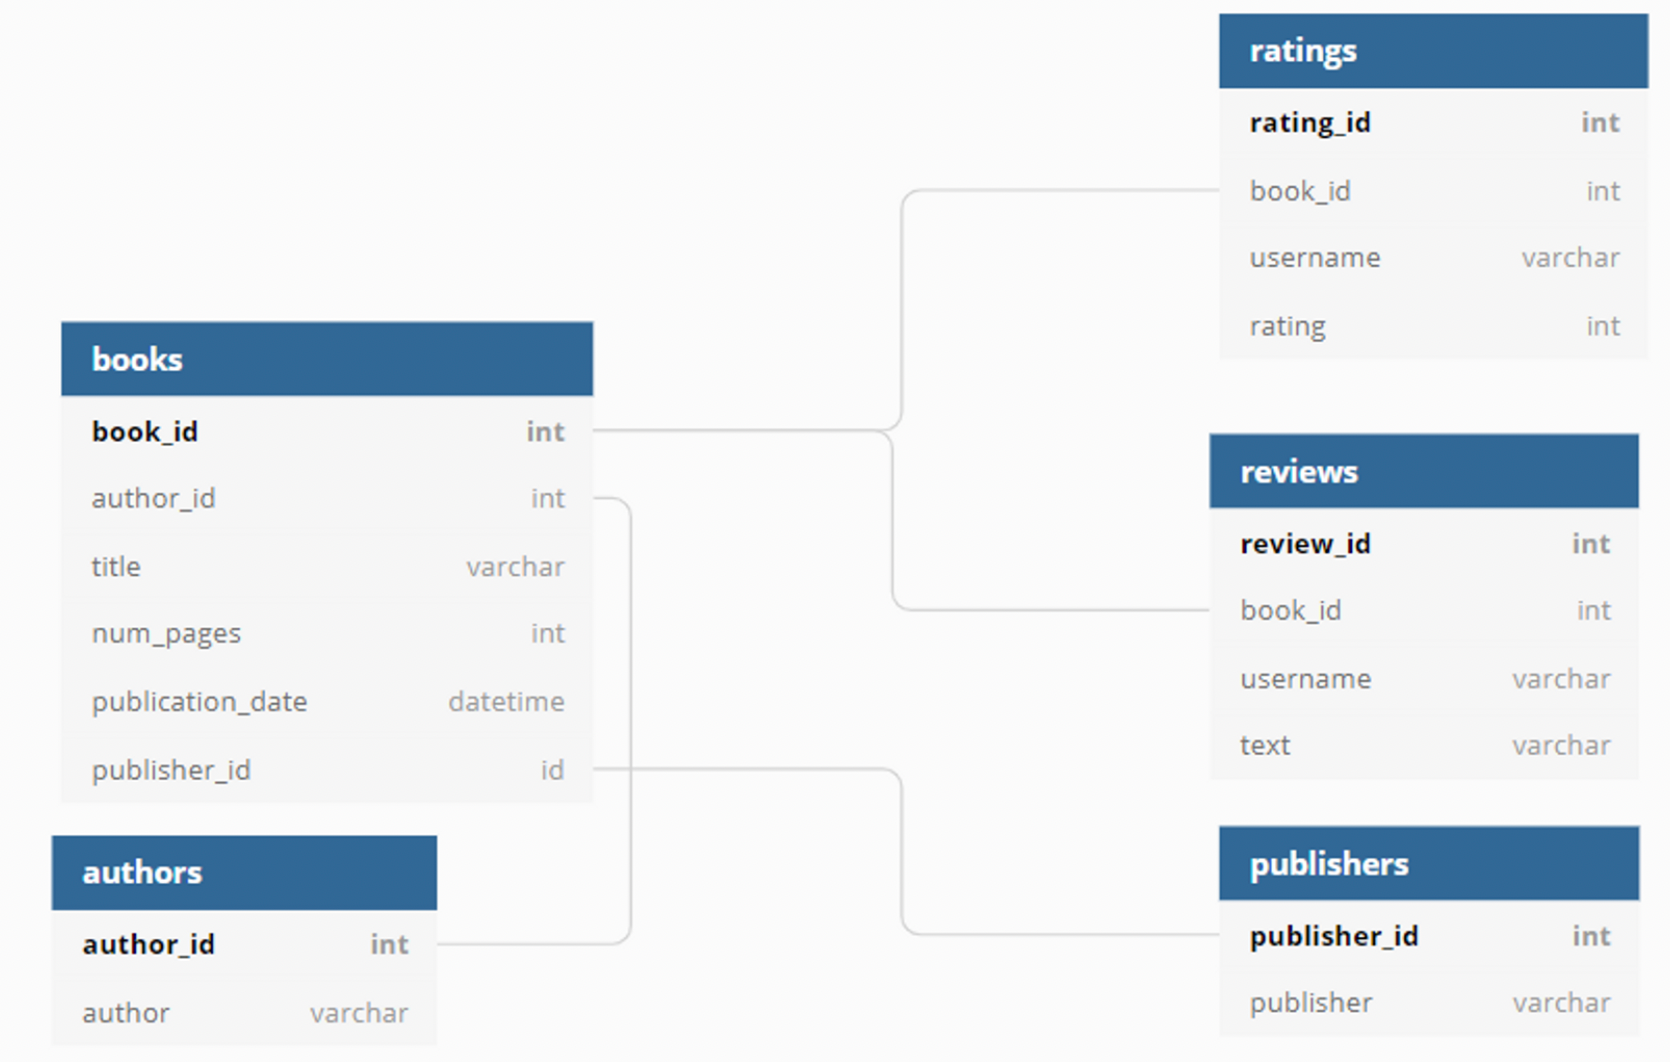

### Контекст

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

### Описание этапов анализа данных

- Посчитать, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитать количество обзоров и среднюю оценку;
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключить из анализа брошюры;
- Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками;
- Посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок.<a id="upload"></a>

## Загрузка данных и подготовка к анализу

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

### Установка параметров

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-final-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'], 
                                                         db_config['pwd'], 
                                                         db_config['host'], 
                                                         db_config['port'],
                                                         db_config['db']) 

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

### Проверка вывода данных <a id="pre"></a>

In [3]:
# цикл вывода БД
for table in ['books', 'authors', 'publishers', 'ratings', 'reviews']:
    query = ''' 
    SELECT * FROM {}; 
    '''.format(table) 

    request = pd.io.sql.read_sql(query, con = engine) 
    display(request.head(3))

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...


**Вывод**
- Таблицы БД выводятся корректно

### Проверка вывод информации о таблицах

In [4]:
# цикл вывода БД
for value in ['books', 'authors', 'publishers', 'ratings', 'reviews']:
    query = ''' 
    SELECT * FROM {}; 
    '''.format(table) 

    df = pd.io.sql.read_sql(query, con = engine) 
    print('Название таблицы:', value)
    print(df.info())
    print('x'*50)
    print()

Название таблицы: books
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
None
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Название таблицы: authors
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
None
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Название таблицы: publishers
<class 'pandas.core.frame

**Вывод**
- Пропуски отсутствуют,
- Названия колонок присвоены корректно,
- Типы данных совпадают

## Задачи

Выполним поставленные задачи по расчетам<a id="analys"></a>

### Количество книг после 2000 года

Посчитем, сколько книг вышло после 1 января 2000 года. Выведем данные таблицы

In [5]:
query = ''' 
SELECT *
FROM books 
''' 
df = pd.io.sql.read_sql(query, con = engine)
df.head(3)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135


Выполним запрос для расчета

In [6]:
query = ''' 
SELECT COUNT(*) 
FROM books
WHERE publication_date > '2000-1-1'; 
''' 

df = pd.io.sql.read_sql(query, con = engine)

print('После 1 января 2000 года вышло книг:', df.values[0,0], 'шт')

После 1 января 2000 года вышло книг: 819 шт


**Вывод**
- После 1 января 2000 года вышло `819` книг

### Количество обзоров и средняя оценка

Посчитаем для каждой книги количество обзоров и среднюю оценку<a id="func"></a>

In [7]:
query = ''' 
SELECT b.book_id,
       b.title,
       AVG(rat.rating) AS avg_rate,
       COUNT(DISTINCT rev.review_id) AS count_reviews

FROM books AS b
LEFT JOIN ratings AS rat ON b.book_id = rat.book_id
LEFT JOIN reviews AS rev ON b.book_id = rev.book_id
GROUP BY b.book_id
ORDER BY avg_rate DESC;

''' 
df = pd.io.sql.read_sql(query, con = engine)
df

,book_id,title,avg_rate,count_reviews
0,86,Arrows of the Queen (Heralds of Valdemar #1),5.00,2
1,901,The Walking Dead Book One (The Walking Dead #...,5.00,2
2,390,Light in August,5.00,2
3,972,Wherever You Go There You Are: Mindfulness Me...,5.00,2
4,136,Captivating: Unveiling the Mystery of a Woman'...,5.00,2
...,...,...,...,...
995,915,The World Is Flat: A Brief History of the Twen...,2.25,3
996,316,His Excellency: George Washington,2.00,2
997,202,Drowning Ruth,2.00,3
998,371,Junky,2.00,2


Проверка по кол-ву `review_id`

In [8]:
query = ''' 
SELECT 
       COUNT(DISTINCT rev.review_id) AS count_reviews

FROM books AS b
LEFT JOIN ratings AS rat ON b.book_id = rat.book_id
LEFT JOIN reviews AS rev ON b.book_id = rev.book_id

''' 
df = pd.io.sql.read_sql(query, con = engine)
df

,count_reviews
0,2793


Всего представлены `1000` книг с разным рейтингом и оценками. Исследуем, какие минимальные и максимальные значения принимают рейтинги и оценки

In [9]:
query = ''' 
SELECT MAX(rating) AS max_rating,
       MIN(rating) AS min_rating

FROM ratings;

''' 
df = pd.io.sql.read_sql(query, con = engine)
df

,max_rating,min_rating
0,5,1


Минимальный рейтинг составляет `1` балл, максимальный `5` баллов. Исследуем количество оценок по книгам максимальное и минимальное

In [10]:
query = ''' 
SELECT  MIN(t.count_reviews),
        MAX(t.count_reviews)
FROM 
    (SELECT b.title AS book_name,
           COUNT(rev.review_id) AS count_reviews

    FROM books AS b
    LEFT JOIN reviews AS rev ON b.book_id = rev.book_id
    GROUP BY b.title
    ORDER BY count_reviews DESC) AS t

''' 
df = pd.io.sql.read_sql(query, con = engine)
df

,min,max
0,0,8


Минимальное число обзоров - `0`, максимальное - `8`

**Вывод**
- Всего представлены `1000` книг с разным рейтингом и оценками,
- Минимальный рейтинг составляет `1` балл, максимальный `5` баллов,
- Минимальное число обзоров - `0`, максимальное - `8`<a id="sourc"></a>

### Издательство, выпустившее наибольшее число книг

Определим издательство, которое выпустило наибольшее число книг. Чтобы в статистику не попали брошюры - исключим издания менее 50 страниц

In [11]:
query = ''' 
SELECT p.publisher AS publisher_name,
       COUNT(b.book_id) AS books_count

FROM books AS b
LEFT JOIN publishers AS p ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY publisher_name
ORDER BY books_count DESC
LIMIT 1;

''' 
df = pd.io.sql.read_sql(query, con = engine)
df

,publisher_name,books_count
0,Penguin Books,42


**Вывод**
- Название издательства, которое выпустило больше всего книг - `Penguin Books`. Количество книг - `42`<a id="show"></a>

### Автор с самой высокой оценкой

Определим автора с самой высокой средней оценкой книг. Будем учитывать только книги с 50 и более оценками

In [12]:
query = ''' 
SELECT e.author AS author,
             AVG(e.avg_rate) AS avg_rate
FROM

(SELECT
     a.author AS author,
     b.book_id AS book_id,
     AVG(r.rating) AS avg_rate,
     COUNT(r.rating) AS count_rating

FROM authors AS a
INNER JOIN books AS b ON b.author_id = a.author_id
INNER JOIN ratings AS r ON r.book_id = b.book_id

GROUP BY
    a.author, b.book_id
    HAVING COUNT(r.rating) >= 50) AS e

GROUP BY author
ORDER BY avg_rate DESC
''' 
df = pd.io.sql.read_sql(query, con = engine)
df

,author,avg_rate
0,J.K. Rowling/Mary GrandPré,4.283844
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.258446
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645
5,William Golding,3.901408
6,J.D. Salinger,3.825581
7,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.789474
8,William Shakespeare/Paul Werstine/Barbara A. M...,3.787879
9,Dan Brown,3.754540


**Вывод**
- Автор с наибольшей оценкой книг - `J.K. Rowling/Mary GrandPré`<a id="events"></a>

### Пользователи и оценки

Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [13]:
query = ''' 
SELECT AVG(e.count_reviews)
FROM
    (SELECT username,
            COUNT(review_id) AS count_reviews
    FROM reviews
    WHERE username IN (SELECT username
                FROM ratings
                GROUP BY username
                HAVING COUNT(rating_id) > 50)
    GROUP BY username) AS e

''' 
df = pd.io.sql.read_sql(query, con = engine)
df

,avg
0,24.333333


**Вывод**
- Среднее количество обзоров от пользователей, которые поставили больше 50 оценок составляет `24`<a id="final"></a>

## Общий вывод

- После 1 января 2000 года вышло `819` книг
- Всего представлены `1000` книг с разным рейтингом и оценками. Минимальный рейтинг составляет `1` балл, максимальный `5` баллов. Минимальное число обзоров - `0`, максимальное - `8`
- Название издательства, которое выпустило больше всего книг - `Penguin Books`. Количество книг - `42`
- Автор с наибольшей оценкой книг - `J.K. Rowling/Mary GrandPré`
- Среднее количество обзоров от пользователей, которые поставили больше 50 оценок составляет `24`